# Texas Unemployment and Wages Review and Analytics 

## Import the required libraries and dependencies

In [1]:
import plotly.express as px
import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv

### Prep the Mapbox API Access Token

In [2]:
# Read the Mapbox API access token from the .env file
load_dotenv()
mapbox_api_access_token = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Confirm that the mapbox_api_access_token is available
if not mapbox_api_access_token:
    print("Error with the Mapbox API access token. Check the .env file.")

Error with the Mapbox API access token. Check the .env file.


In [3]:
# Set the Mapbox API access token
px.set_mapbox_access_token(mapbox_api_access_token)

### Prepare the DataFrame

In [4]:
# Read in the US_Inflation.csv file into a DataFrame
us_Inflation_df = pd.read_csv(
    Path("../Resources/US_Inflation.csv")
).drop_duplicates()

# Review the DataFrame
display(us_Inflation_df.head())
display(us_Inflation_df.tail())


Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct  \
0  2006  0.040  0.036  0.034  0.036  0.040  0.042  0.041  0.039  0.020  0.014   
1  2007  0.021  0.024  0.028  0.026  0.027  0.027  0.023  0.019  0.028  0.036   
2  2008  0.043  0.041  0.040  0.039  0.041  0.049  0.055  0.053  0.050  0.037   
3  2009 -0.001  0.000 -0.004 -0.006 -0.010 -0.012 -0.020 -0.015 -0.014 -0.002   
4  2010  0.026  0.022  0.023  0.022  0.020  0.011  0.013  0.012  0.011  0.012   

     Nov    Dec  
0  0.020  0.025  
1  0.044  0.041  
2  0.011  0.000  
3  0.019  0.028  
4  0.011  0.014

Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep  \
11  2017  0.025  0.028  0.024  0.022  0.019  0.017  0.017  0.019  0.022   
12  2018  0.021  0.022  0.024  0.025  0.028  0.028  0.029  0.027  0.023   
13  2019  0.015  0.015  0.019  0.020  0.018  0.017  0.018  0.017  0.017   
14  2020  0.025  0.023  0.015  0.003  0.002  0.007  0.010  0.013  0.014   
15  2021  0.014  0.017  0.026  0.042  0.049  0.053    NaN    NaN    NaN   

      Oct    Nov    Dec  
11  0.020  0.022  0.021  
12  0.025  0.022  0.019  
13  0.018  0.020  0.023  
14  0.012  0.011  0.013  
15    NaN    NaN    NaN

In [5]:
# Read in the Texas_Unemployment_Rate_by_area.csv file into a DataFrame
unemployment_Rate_df = pd.read_csv(
    Path("../Resources/Texas_Unemployment_Rate_by_area.csv")
).drop_duplicates()

# Review the DataFrame
display(unemployment_Rate_df.head())
display(unemployment_Rate_df.tail())

Year    Period   Area Area Type    Adjustment  Employment  \
0  2006    Annual  Texas     Texas  Not Adjusted  10,770,786   
1  2006   January  Texas     Texas  Not Adjusted  10,575,831   
2  2006   January  Texas     Texas      Adjusted  10,647,444   
3  2006  February  Texas     Texas  Not Adjusted  10,620,818   
4  2006  February  Texas     Texas      Adjusted  10,664,814   

  Civilian Labor Force Unemployment   Unemployment Rate   Unnamed: 9  \
0           11,335,112      564,326                0.050         NaN   
1           11,169,955      594,124                0.053         NaN   
2           11,240,453      593,009                0.053         NaN   
3           11,224,932      604,114                0.054         NaN   
4           11,253,367      588,553                0.052         NaN   

   Unnamed: 10  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

Year    Period                                               Area  \
57064  2021  February  Zavala                                        ...   
57065  2021     March  Zavala                                        ...   
57066  2021     April  Zavala                                        ...   
57067  2021       May  Zavala                                        ...   
57068  2021      June  Zavala                                        ...   

      Area Type    Adjustment Employment Civilian Labor Force Unemployment  \
57064    County  Not Adjusted      2,996                3,562          566   
57065    County  Not Adjusted      3,012                3,537          525   
57066    County  Not Adjusted      2,952                3,426          474   
57067    County  Not Adjusted      2,921                3,338          417   
57068    County  Not Adjusted      2,885                3,365          480   

        Unemployment Rate   Unnamed: 9  Unnamed: 10  
57064                0.159         NaN          NaN  
57065                0.148         NaN          NaN  
57066                0.138         NaN          NaN  
57067                0.125         NaN          NaN  
57068                0.143         NaN          NaN

In [6]:
# Read in the All_Sector_Employment_and_Wages_Report_by_area.csv and Finance_and_Insurance_Sector_Employment_and_Wages_Report_by_area.csv files into a DataFrame
employment_wages_df = pd.read_csv(
    Path("../Resources/All_Sector_Employment_and_Wages_Report_by_area.csv")
).drop_duplicates()
finance_employment_wages_df = pd.read_csv(
    Path("../Resources/Finance_and_Insurance_Sector_Employment_and_Wages_Report_by_area.csv")
).drop_duplicates()

# Review the DataFrame
display(employment_wages_df.head())
display(employment_wages_df.tail())
display(finance_employment_wages_df.head())
display(finance_employment_wages_df.tail())

Year  Period   Area Ownership  Industry Code               Industry  Level  \
0  2006       1  Texas   Private             10  Total, All Industries      0   
1  2006       2  Texas   Private             10  Total, All Industries      0   
2  2006       3  Texas   Private             10  Total, All Industries      0   
3  2006       4  Texas   Private             10  Total, All Industries      0   
4  2007       1  Texas   Private             10  Total, All Industries      0   

  Establishments    Firms Average Employment Average Weekly Wage  \
0        515,102  416,752          8,038,695                 849   
1        519,735  419,437          8,218,777                 793   
2        524,387  423,282          8,309,962                 792   
3        526,555  424,841          8,387,231                 894   
4        546,806  442,863          8,332,603                 897   

      Total Wages Month 1 Employment Month 2 Employment Month 3 Employment  \
0  88,758,786,375          7,973,395          8,025,478          8,117,211   
1  84,676,328,496          8,155,790          8,212,863          8,287,677   
2  85,541,087,537          8,271,543          8,325,079          8,333,265   
3  97,505,107,022          8,324,350          8,389,998          8,447,345   
4  97,210,303,102          8,255,788          8,325,113          8,416,907   

   Hierarchical Ordering  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1

Year  Period       Area Ownership  Industry Code  \
16904  2020       4  Galveston   Private             10   
16905  2020       4      Smith   Private             10   
16906  2020       4     Nueces   Private             10   
16907  2020       4    Hidalgo   Private             10   
16908  2020       4    El Paso   Private             10   

                    Industry  Level Establishments   Firms Average Employment  \
16904  Total, All Industries      0          6,345   5,567             76,586   
16905  Total, All Industries      0          6,372   5,776             89,568   
16906  Total, All Industries      0          8,199   6,939            124,153   
16907  Total, All Industries      0         12,674  10,641            204,327   
16908  Total, All Industries      0         15,688  12,877            237,217   

      Average Weekly Wage    Total Wages Month 1 Employment  \
16904               1,053  1,048,381,722             76,327   
16905               1,023  1,191,597,505             88,964   
16906               1,044  1,685,520,315            124,108   
16907                 697  1,852,344,963            201,333   
16908                 817  2,520,622,816            237,609   

      Month 2 Employment Month 3 Employment  Hierarchical Ordering  
16904             77,017             76,413                      1  
16905             89,635             90,106                      1  
16906            124,203            124,148                      1  
16907            205,430            206,217                      1  
16908            236,221            237,820                      1

Year  Period   Area Ownership  Industry Code               Industry  Level  \
0  2006       1  Texas   Private             52  Finance and Insurance      2   
1  2006       2  Texas   Private             52  Finance and Insurance      2   
2  2006       3  Texas   Private             52  Finance and Insurance      2   
3  2006       4  Texas   Private             52  Finance and Insurance      2   
4  2007       1  Texas   Private             52  Finance and Insurance      2   

  Establishments   Firms Average Employment Average Weekly Wage  \
0         32,485  20,113            435,081               1,350   
1         32,859  20,145            440,936               1,096   
2         33,047  20,205            444,250               1,109   
3         33,309  20,303            448,150               1,257   
4         34,418  21,145            448,478               1,515   

     Total Wages Month 1 Employment Month 2 Employment Month 3 Employment  \
0  7,637,072,749            432,888            434,911            437,445   
1  6,284,960,477            438,801            440,522            443,485   
2  6,407,066,768            442,912            444,664            445,175   
3  7,325,413,106            446,255            447,407            450,787   
4  8,835,306,484            446,848            448,575            450,010   

   Hierarchical Ordering  
0                   1775  
1                   1775  
2                   1775  
3                   1775  
4                   1775

Year  Period     Area Ownership  Industry Code               Industry  \
13703  2020       4    Bexar   Private             52  Finance and Insurance   
13704  2020       4   Travis   Private             52  Finance and Insurance   
13705  2020       4  Tarrant   Private             52  Finance and Insurance   
13706  2020       4   Dallas   Private             52  Finance and Insurance   
13707  2020       4   Harris   Private             52  Finance and Insurance   

       Level Establishments  Firms Average Employment Average Weekly Wage  \
13703      2          2,412  1,460             63,608               1,838   
13704      2          2,633  1,823             37,022               2,710   
13705      2          3,056  2,006             47,534               1,968   
13706      2          5,419  3,677            116,937               2,340   
13707      2          6,789  4,303             77,575               2,502   

         Total Wages Month 1 Employment Month 2 Employment Month 3 Employment  \
13703  1,519,788,106             63,474             63,693             63,656   
13704  1,304,276,637             36,710             36,999             37,356   
13705  1,215,794,720             47,391             47,630             47,580   
13706  3,556,651,413            116,633            116,908            117,270   
13707  2,523,501,823             77,366             77,656             77,704   

       Hierarchical Ordering  
13703                   1775  
13704                   1775  
13705                   1775  
13706                   1775  
13707                   1775

### Finance Sector vs. Total Industry Analysis

In [14]:
# Merge employment and wages data
all_employment_wages_df = pd.merge(employment_wages_df,finance_employment_wages_df, on=["Year", "Period", "Area"])

# Drop column Ownership, Industry Code, Industry from dataframe
all_employment_wages_df = all_employment_wages_df.drop(columns=['Industry_x', 'Industry Code_x', 'Level_x',
                                    'Month 1 Employment_x', 'Month 2 Employment_x', 'Month 3 Employment_x',
                                    'Hierarchical Ordering_x', 'Total Wages_x', 'Ownership_x', 'Industry Code_y', 
                                    'Industry_y', 'Level_y','Month 1 Employment_y','Month 2 Employment_y',
                                    'Month 3 Employment_y','Hierarchical Ordering_y', 'Total Wages_y', 'Ownership_y'])

# Rename columns
all_employment_wages_df = all_employment_wages_df.rename(columns={'Establishments_x': 'Total Establishments',
                                   'Firms_x': 'Total Firms',
                                   'Average Employment_x': 'Total Average Employment',
                                   'Average Weekly Wage_x': 'Total Average Weekly Wage',
                                   'Establishments_y': 'Finance Establishments',
                                   'Firms_y': 'Finance Firms',
                                   'Average Employment_y': 'Finance Average Employment',
                                   'Average Weekly Wage_y': 'Finance Average Weekly Wage'
                                   })

# Create Quarter column
all_employment_wages_df['Quarter'] = all_employment_wages_df['Year'].astype (str) + 'q' + all_employment_wages_df['Period'].astype (str)
# all_employment_wages_df['Firms % of Total'] = all_employment_wages_df.apply(lambda row: row['Finance Firms'] / row['Total Firms'], axis=1)

all_employment_wages_df[["Total Firms", "Finance Firms"]] = all_employment_wages_df[["Total Firms", "Finance Firms"]].apply(pd.to_numeric)

# Review the DataFrame
all_employment_wages_df.dtypes

#display(all_employment_wages_df.head())
#display(all_employment_wages_df.tail())

ValueError: Unable to parse string "416,752" at position 0

In [55]:
# Filter the DataFrame to include only Texas state data and create Texas Finance Sector employment dataframe
tx_employment_df = all_employment_wages_df[(all_employment_wages_df["Area"] == "Texas")]
tx_total_firms_data = [tx_employment_df['Quarter'], tx_employment_df['Total Firms'], tx_employment_df['Finance Firms']]
tx_total_firms_data
# tx_finance_sector_employment_data[Finance Firms % of Total]

# Create a DataFrame consisting of the Year, Quarter, Industry, Establishments, Firms, Average Employment and Average Weekly Wage columns
# tx_employment_plot_df = tx_employment_data[["Year", "Period", "Establishments", "Firms", "Average Employment", "Average Weekly Wage"]]

# Review the DataFrame
# display(tx_employment_plot_df.head())
# display(tx_employment_plot_df.tail())


[0     2006q1
 1     2006q2
 2     2006q3
 3     2006q4
 4     2007q1
 5     2007q2
 6     2007q3
 7     2007q4
 8     2008q1
 9     2008q2
 10    2008q3
 11    2008q4
 12    2009q1
 13    2009q2
 14    2009q3
 15    2009q4
 16    2010q1
 17    2010q2
 18    2010q3
 19    2010q4
 20    2011q1
 21    2011q2
 22    2011q3
 23    2011q4
 24    2012q1
 25    2012q2
 26    2012q3
 27    2012q4
 28    2013q1
 29    2013q2
 30    2013q3
 31    2013q4
 32    2014q1
 33    2014q2
 34    2014q3
 35    2014q4
 36    2015q1
 37    2015q2
 38    2015q3
 39    2015q4
 40    2016q1
 41    2016q2
 42    2016q3
 43    2016q4
 44    2017q1
 45    2017q2
 46    2017q3
 47    2017q4
 48    2018q1
 49    2018q2
 50    2018q3
 51    2018q4
 52    2019q1
 53    2019q2
 54    2019q3
 55    2019q4
 56    2020q1
 57    2020q2
 58    2020q3
 59    2020q4
 Name: Quarter, dtype: object,
 0     416,752
 1     419,437
 2     423,282
 3     424,841
 4     442,863
 5     445,383
 6     449,565
 7     450,837
 8     43

In [25]:
# Create a DataFrame consisting of the CityName, PopulationCount, Latitude and Longitude columns
ny_plot_df = tx_data[["Year", "Period", "Industry", "Firms"]]

# Review the DataFrame
ny_plot_df.head()

Year  Period               Industry    Firms
0  2006       1  Total, All Industries  416,752
1  2006       2  Total, All Industries  419,437
2  2006       3  Total, All Industries  423,282
3  2006       4  Total, All Industries  424,841
4  2007       1  Total, All Industries  442,863

In [18]:
# Aggregate all columns by CityName
ny_plot_df.groupby('CityName').sum()

PopulationCount       Latitude      Longitude
CityName                                                   
Albany                 391424    2303.679834   -3984.343100
Buffalo               1045240    6865.515498  -12615.879974
Mount Vernon           269168    1718.361217   -3100.942100
New Rochelle           308248    1309.434711   -2361.113032
New York             32700532  174347.556785 -316506.826218
Rochester              842260    7251.631927  -13038.413050
Schenectady            264540    1797.846419   -3105.129062
Syracuse               580680    4906.963147   -8680.587265
Yonkers                783904    4257.731195   -7682.499631

In [19]:
# Aggregate only Population Count by CityName (since it doesn't make sense to accumulate Latitude nor Longitude)
ny_plot_df.groupby('CityName')['PopulationCount'].sum()

CityName
Albany            391424
Buffalo          1045240
Mount Vernon      269168
New Rochelle      308248
New York        32700532
Rochester         842260
Schenectady       264540
Syracuse          580680
Yonkers           783904
Name: PopulationCount, dtype: int64

### Plot data

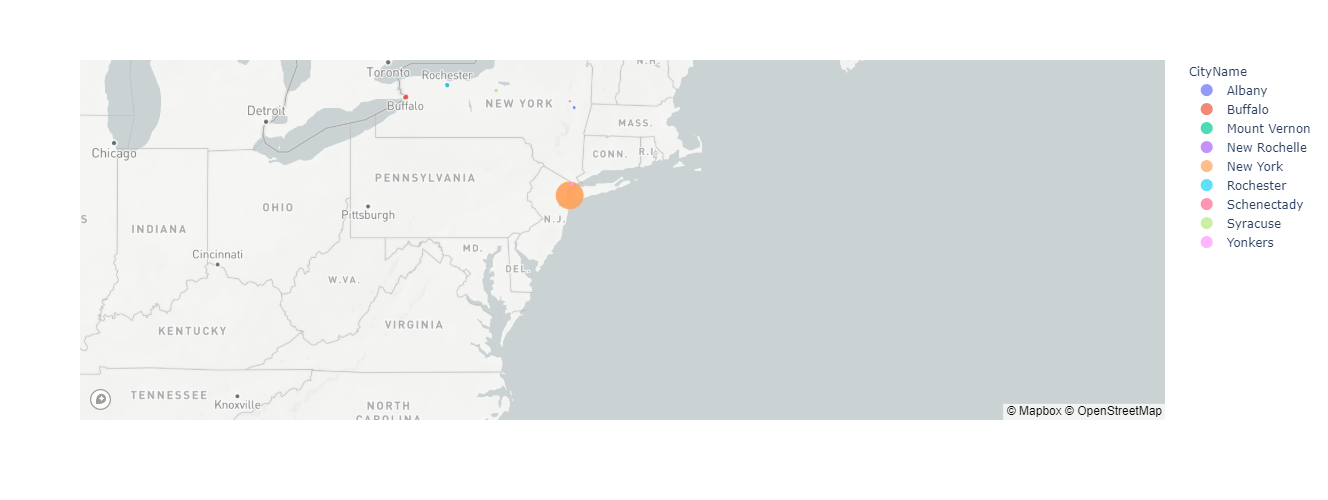

In [20]:
# Plot the data using the Mapbox API
map_plot = px.scatter_mapbox(
    ny_plot_df,
    lat="Latitude",
    lon="Longitude",
    size="PopulationCount",
    color="CityName",
    height=500, 
    zoom=4
)

# Display the map
map_plot.show()